# 绘制拼接的实时带宽图

将每个benchmark的所有命令产生的数据进行拼接。


In [1]:
csv_path_DMC = '../data/csv/dmc_620/500.perlbench_r_iter0_1732726637.csv'

封装一下得到两种时间序列的方法：
输入都是已经读到pandas里的时间序列。

In [2]:
def get_DMC_series(perf_raw_data_DMC):
    
    perf_raw_data_DMC['type'] = perf_raw_data_DMC['event'].apply(
        lambda x: 'read' if x[-2:-1] == '0' else 'write'
    )
    perf_raw_data_DMC['device_id'] = perf_raw_data_DMC['event'].apply(
        lambda x: x[11:20]
    )
    perf_raw_data_DMC['socket'] = perf_raw_data_DMC['device_id'].apply(
        lambda x: 0 if x[0] == '1' else '1'
    )

    perf_raw_data_DMC = perf_raw_data_DMC.drop('event', axis=1)

    bw_all_DMC = perf_raw_data_DMC.groupby(['timestamp']).agg(value=('value', 'sum')).reset_index()
    bw_all_DMC['interval'] = bw_all_DMC['timestamp'].diff()
    bw_all_DMC.loc[0, 'interval'] = bw_all_DMC.loc[0, 'timestamp']
    bw_all_DMC['memory bandwidth (GB/s)'] = (bw_all_DMC['value'] * 64) / (bw_all_DMC['interval'] * 1000000000)

    return bw_all_DMC['memory bandwidth (GB/s)']

检查一下正确性：

In [3]:
import numpy as np

In [4]:
def plot_series(series, title="Time Series", xlabel="Time", ylabel="Value"):
    plt.figure(figsize=(8, 4))
    plt.plot(DMC_series, label=title)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

批处理绘制拼接的带宽曲线

In [6]:
import os
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

save_image_path = '../data/images/dmc_620/concatenated/'

DMC_csv_dir = "../data/csv/dmc_620/"


DMC_files = os.listdir(DMC_csv_dir)
print(DMC_files)

bench_nums = list(set([fileName.split('.')[0] for fileName in DMC_files]))
bench_nums.sort()

print(bench_nums)


for bench_num in bench_nums:

    DMC_bench_files = [benchName for benchName in DMC_files if benchName.startswith(bench_num)]
    DMC_bench_files.sort()

    breaks = [0]
    DMC_series = []
    for DMC_bench_file in DMC_bench_files:
        perf_raw_data_DMC = pd.read_csv(DMC_csv_dir + DMC_bench_file,
                                    sep='|',
                                    header=None, 
                                    names=["timestamp", "value", "event"], 
                                    usecols=[0, 1, 3])
        DMC_series += list(get_DMC_series(perf_raw_data_DMC))
        breaks.append(len(DMC_series))



    plt.figure(figsize=(8, 4))
    plt.plot(DMC_series, label="DMC_curve")
    plt.xlabel('Timestamp (s)')
    plt.ylabel('Memory Bandwidth (GB/s)')

    for break_point in breaks:
        plt.axvline(break_point, linestyle='--', color='red', alpha=0.7)

    # plt.legend()
    plt.title(f"benchmark {bench_num}")
    #TODO: save the figure as diff_image_path/bench_num.png
    image_path = os.path.join(save_image_path, f"{bench_num}.png")
    plt.savefig(image_path, dpi = 300)  # 保存图像
    plt.close()
    print(f"Alignment figure saved to {image_path}")
    

    # print(len(CMN_series))
    # print(len(DMC_series))
    # print("alignment:", alignment)


['548.exchange2_r_iter0_1732750002.csv', '527.cam4_r_iter0_1732794948.csv', '510.parest_r_iter0_1732768188.csv', '500.perlbench_r_iter0_1732726864.csv', '500.perlbench_r_iter0_1732726637.csv', '554.roms_r_iter0_1732815649.csv', '503.bwaves_r_iter0_1732756430.csv', '502.gcc_r_iter0_1732729463.csv', '503.bwaves_r_iter0_1732756031.csv', '511.povray_r_iter0_1732775012.csv', '502.gcc_r_iter0_1732729258.csv', '544.nab_r_iter0_1732800100.csv', '525.x264_r_iter0_1732744989.csv', '508.namd_r_iter0_1732765192.csv', '503.bwaves_r_iter0_1732757065.csv', '507.cactuBSSN_r_iter0_1732763198.csv', '538.imagick_r_iter0_1732797687.csv', '502.gcc_r_iter0_1732729345.csv', '541.leela_r_iter0_1732747999.csv', '500.perlbench_r_iter0_1732726973.csv', '503.bwaves_r_iter0_1732757570.csv', '520.omnetpp_r_iter0_1732738175.csv', '557.xz_r_iter0_1732752354.csv', '526.blender_r_iter0_1732792925.csv', '519.lbm_r_iter0_1732778962.csv', '505.mcf_r_iter0_1732732987.csv', '502.gcc_r_iter0_1732729593.csv', '531.deepsjeng_r

In [18]:
import matplotlib.pyplot as plt
import os
import pandas as pd

curves = {}

for i, bench_num in enumerate(bench_nums):
    if i >= len(axes):  # 避免超出子图数量
        break

    ax = axes[i]  # 选择当前子图

    DMC_bench_files = [benchName for benchName in DMC_files if benchName.startswith(bench_num)]
    DMC_bench_files.sort()

    breaks = [0]
    DMC_series = []
    for DMC_bench_file in DMC_bench_files:
        perf_raw_data_DMC = pd.read_csv(DMC_csv_dir + DMC_bench_file,
                                        sep='|',
                                        header=None, 
                                        names=["timestamp", "value", "event"], 
                                        usecols=[0, 1, 3])
        DMC_series += list(get_DMC_series(perf_raw_data_DMC))
        breaks.append(len(DMC_series))

    curves["" + bench_num] = DMC_series


再画一张全家福

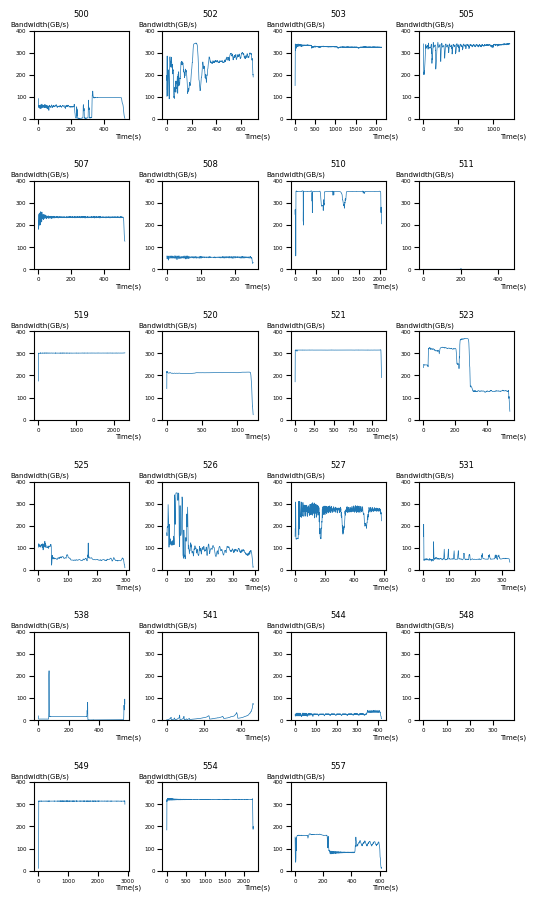

Combined figure saved to ../data/images/dmc_620/concatenated/all_benchmarks——6X4.png


In [84]:
import matplotlib.pyplot as plt
import os
import pandas as pd

nrows = 6  # 设定子图行数
ncols = 4  # 设定子图列数
fig, axes = plt.subplots(nrows, ncols, figsize=(6, 12), gridspec_kw={'wspace': 0.35, 'hspace': 0.7})  # 创建网格布局

axes = axes.flatten()  # 将 2D 数组展平成 1D，方便遍历
num_plots = len(bench_nums)  # 总共要画的子图数量

for i, bench_num in enumerate(bench_nums):
    if i >= len(axes):  # 避免超出子图数量
        break

    ax = axes[i]  # 选择当前子图



    DMC_series = curves["" + bench_num]

    ax.plot(DMC_series, label="DMC_curve", linewidth=0.5)
    # ax.set_xlabel('Timestamp (s)', fontsize=5)
    # ax.set_ylabel('Memory Bandwidth (GB/s)', fontsize=5)                "    # 添加横纵坐标名称到箭头旁边",
    ax.annotate('Time(s)', xy=(1, 0), xycoords='axes fraction', fontsize=5,xytext=(-10, -10), textcoords='offset points', ha='left', va='top')
    ax.annotate('Bandwidth(GB/s)', xy=(0, 1), xycoords='axes fraction', fontsize=5,xytext=(25, 2), textcoords='offset points', ha='right', va='bottom') # rotation=90



    ax.set_title(f"{bench_num}", fontsize=6, pad=10)
    ax.set_ylim(0, 400)  # 设置 y 轴范围为 0 到 300GB/s
    ax.set_yticks(range(0, 401, 100))
    # 添加竖线标记 breakpoints
    # for break_point in breaks:
    #     ax.axvline(break_point, linestyle='--', color='red', alpha=0.7)


    ax.tick_params(axis='both', labelsize=4)  # 缩小刻度字体，避免重叠
    ax.tick_params(axis='both', labelsize=4, pad=2)  # 减小 pad 值让数字更靠近轴
    

# 删除多余的空白子图
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


# 如果需要进一步手动调整子图间距，可以使用 subplots_adjust",
fig.subplots_adjust(left=0.1, right=0.9, top=1.8, bottom=1.1)

# plt.tight_layout()  # 调整子图间距
image_path = os.path.join(save_image_path, "all_benchmarks——6X4.png")
plt.savefig(image_path, dpi=100)  # 保存高清图片
plt.show()
# plt.close()
print(f"Combined figure saved to {image_path}")
